# Importing Required Libraries for the tasks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download and load the csv file

In [3]:
df = pd.read_csv("global_superstore.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Check for null values in Dataset

In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# Select Some Specific Features of reuired and make a data frame from it

In [5]:
features = ["Sales", "Region", "Profit", "Category", "Sub-Category", "Product Name", "Order Date", "Ship Date", "Discount"]
df = df[features]

In [6]:
df.head()

,Sales,Region,Profit,Category,Sub-Category,Product Name,Order Date,Ship Date,Discount
0,2309.650,East,762.1845,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,31-07-2012,31-07-2012,0.0
1,3709.395,Oceania,-288.7650,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",05-02-2013,07-02-2013,0.1
2,5175.171,Oceania,919.9710,Technology,Phones,"Nokia Smart Phone, with Caller ID",17-10-2013,18-10-2013,0.1
3,2892.510,Central,-96.5400,Technology,Phones,"Motorola Smart Phone, Cordless",28-01-2013,30-01-2013,0.1
4,2832.960,Africa,311.5200,Technology,Copiers,"Sharp Wireless Fax, High-Speed",05-11-2013,06-11-2013,0.0


In [7]:
df.tail()

,Sales,Region,Profit,Category,Sub-Category,Product Name,Order Date,Ship Date,Discount
51285,65.100,North Asia,4.5000,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",19-06-2014,19-06-2014,0.0
51286,0.444,Central,-1.1100,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,20-06-2014,24-06-2014,0.8
51287,22.920,West,11.2308,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",02-12-2013,02-12-2013,0.0
51288,13.440,South,2.4000,Office Supplies,Binders,"Acco Index Tab, Economy",18-02-2012,22-02-2012,0.0
51289,61.380,Central,1.8000,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",22-05-2012,26-05-2012,0.0


# Check if dataframe have null values or not

In [8]:
df.isnull().sum()

Sales           0
Region          0
Profit          0
Category        0
Sub-Category    0
Product Name    0
Order Date      0
Ship Date       0
Discount        0
dtype: int64

In [9]:
df.describe()

,Sales,Profit,Discount
count,51290.000000,51290.000000,51290.000000
mean,246.490581,28.610982,0.142908
std,487.565361,174.340972,0.212280
min,0.444000,-6599.978000,0.000000
25%,30.758625,0.000000,0.000000
50%,85.053000,9.240000,0.000000
75%,251.053200,36.810000,0.200000
max,22638.480000,8399.976000,0.850000


# Handle missing values by filling them with appropriate measures (mean, median, or placeholders) or by removing affected rows/columns.

In [10]:
numerical_cols = ["Sales", "Profit"]
df_cleaned = df.drop_duplicates().copy()

In [11]:
for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].where(~df_cleaned[col].duplicated(keep=False))

In [12]:
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

In [13]:
df_cleaned.head()

,Sales,Region,Profit,Category,Sub-Category,Product Name,Order Date,Ship Date,Discount
0,2309.650,East,762.1845,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,31-07-2012,31-07-2012,0.0
1,3709.395,Oceania,-288.7650,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",05-02-2013,07-02-2013,0.1
2,5175.171,Oceania,919.9710,Technology,Phones,"Nokia Smart Phone, with Caller ID",17-10-2013,18-10-2013,0.1
3,2892.510,Central,-96.5400,Technology,Phones,"Motorola Smart Phone, Cordless",28-01-2013,30-01-2013,0.1
4,2832.960,Africa,311.5200,Technology,Copiers,"Sharp Wireless Fax, High-Speed",05-11-2013,06-11-2013,0.0


# Convert the Date column to a datetime object for trend analysis.

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors="coerce")

In [15]:
df[["Order Date", "Ship Date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Ship Date   51290 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 801.5 KB


In [16]:
df

,Sales,Region,Profit,Category,Sub-Category,Product Name,Order Date,Ship Date,Discount
0,2309.650,East,762.1845,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2012-07-31,2012-07-31,0.0
1,3709.395,Oceania,-288.7650,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",2013-02-05,2013-02-07,0.1
2,5175.171,Oceania,919.9710,Technology,Phones,"Nokia Smart Phone, with Caller ID",2013-10-17,2013-10-18,0.1
3,2892.510,Central,-96.5400,Technology,Phones,"Motorola Smart Phone, Cordless",2013-01-28,2013-01-30,0.1
4,2832.960,Africa,311.5200,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2013-11-05,2013-11-06,0.0
...,...,...,...,...,...,...,...,...,...
51285,65.100,North Asia,4.5000,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",2014-06-19,2014-06-19,0.0
51286,0.444,Central,-1.1100,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,2014-06-20,2014-06-24,0.8
51287,22.920,West,11.2308,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",2013-12-02,2013-12-02,0.0
51288,13.440,South,2.4000,Office Supplies,Binders,"Acco Index Tab, Economy",2012-02-18,2012-02-22,0.0


# Plot time series graphs to observe trends in Sales over time.

In [17]:
sales_trend = df.groupby("Order Date")["Sales"].sum()

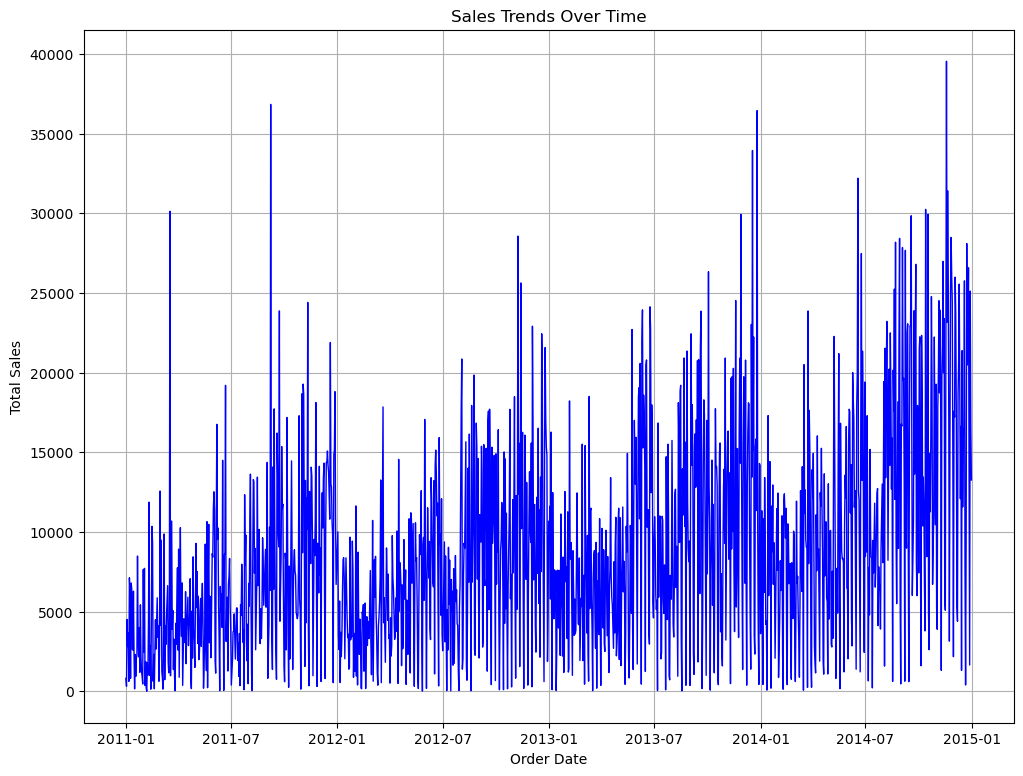

In [18]:
plt.figure(figsize=(12, 9))
plt.plot(sales_trend.index, sales_trend.values, color="blue", linewidth=1)
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.grid(True)
plt.show()

# Plot time series graphs to observe trends in Sales over time.

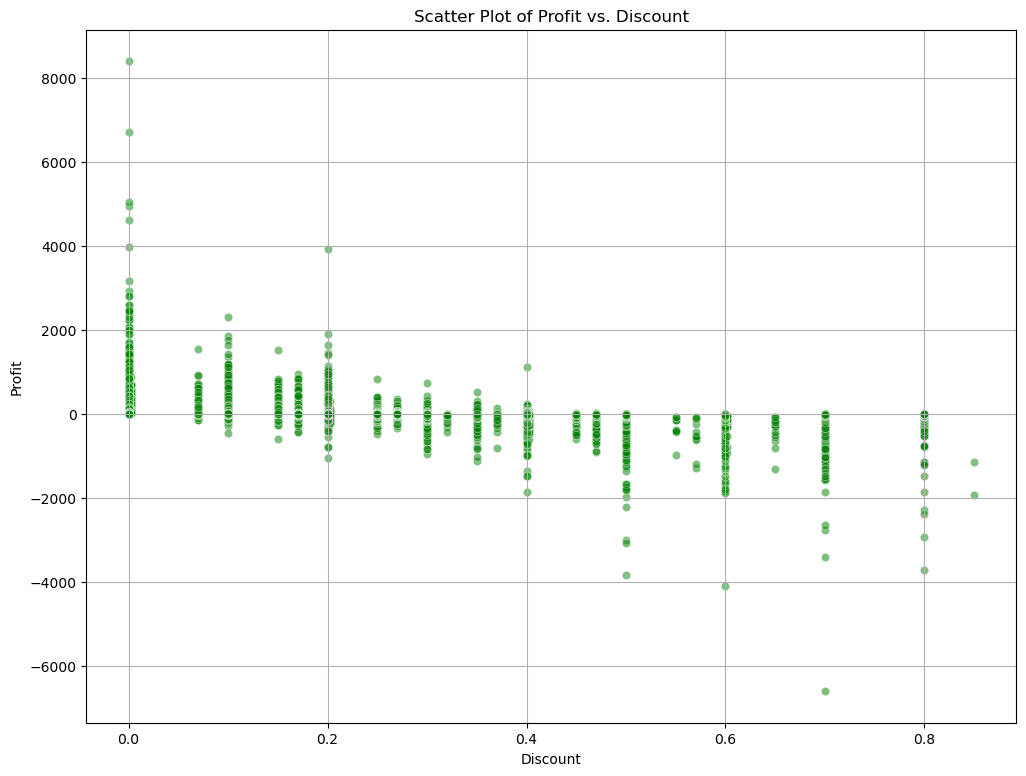

In [19]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5, color="green")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Scatter Plot of Profit vs. Discount")
plt.grid(True)
plt.show()

# Visualize sales distribution by Region using bar plot

In [20]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

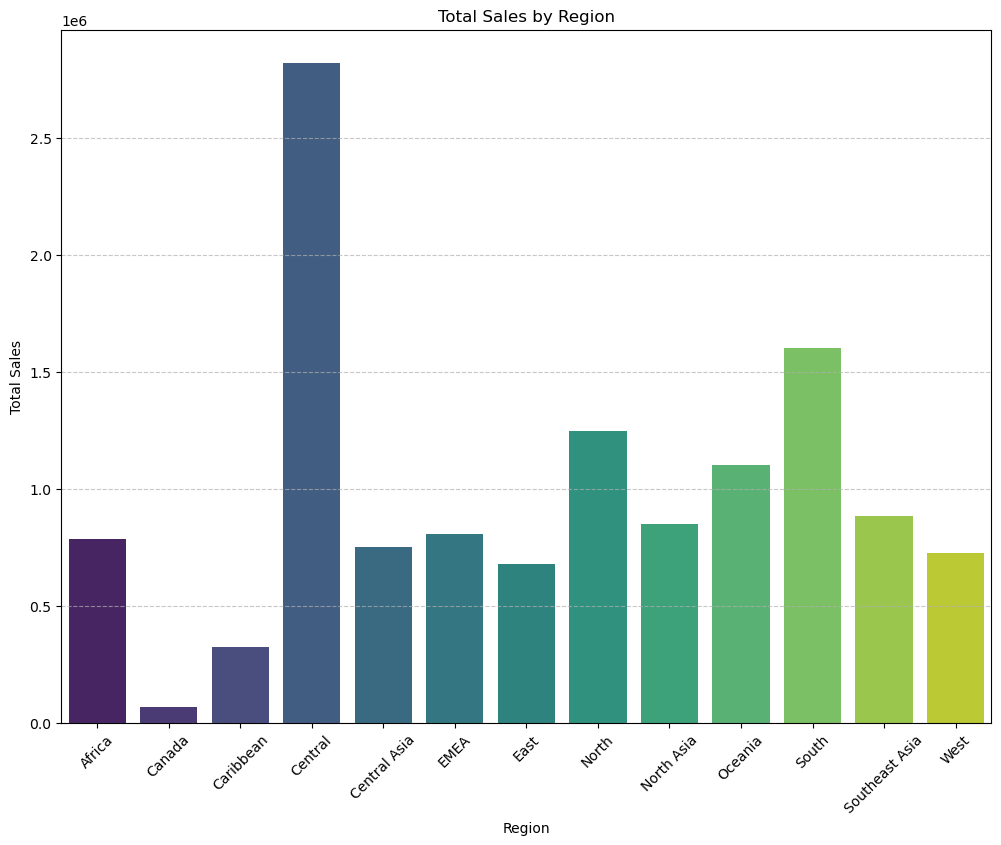

In [21]:
plt.figure(figsize=(12, 9))
sns.barplot(x="Region", y="Sales", hue="Region", data=region_sales, palette="viridis", legend=False)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualize sales distribution by Region using pie chart

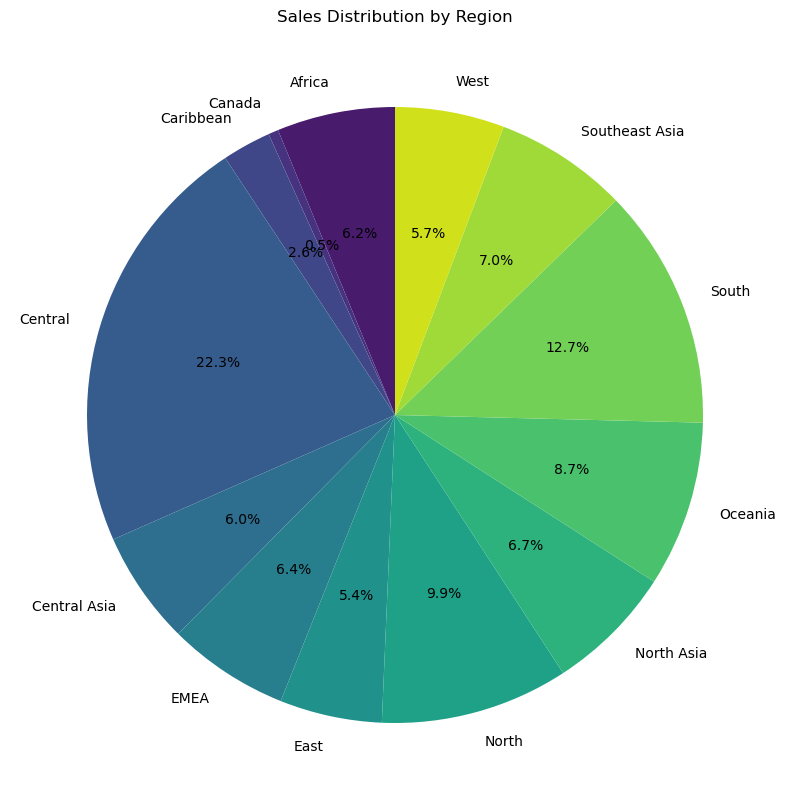

In [22]:
region_sales = df.groupby("Region")["Sales"].sum()
region_sales = region_sales.dropna()
region_sales.index = region_sales.index.astype(str)
plt.figure(figsize=(10, 10))
colors = sns.color_palette("viridis", len(region_sales))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Sales Distribution by Region")
plt.show()

# Visualize sales distribution by Category using bar plot

In [23]:
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

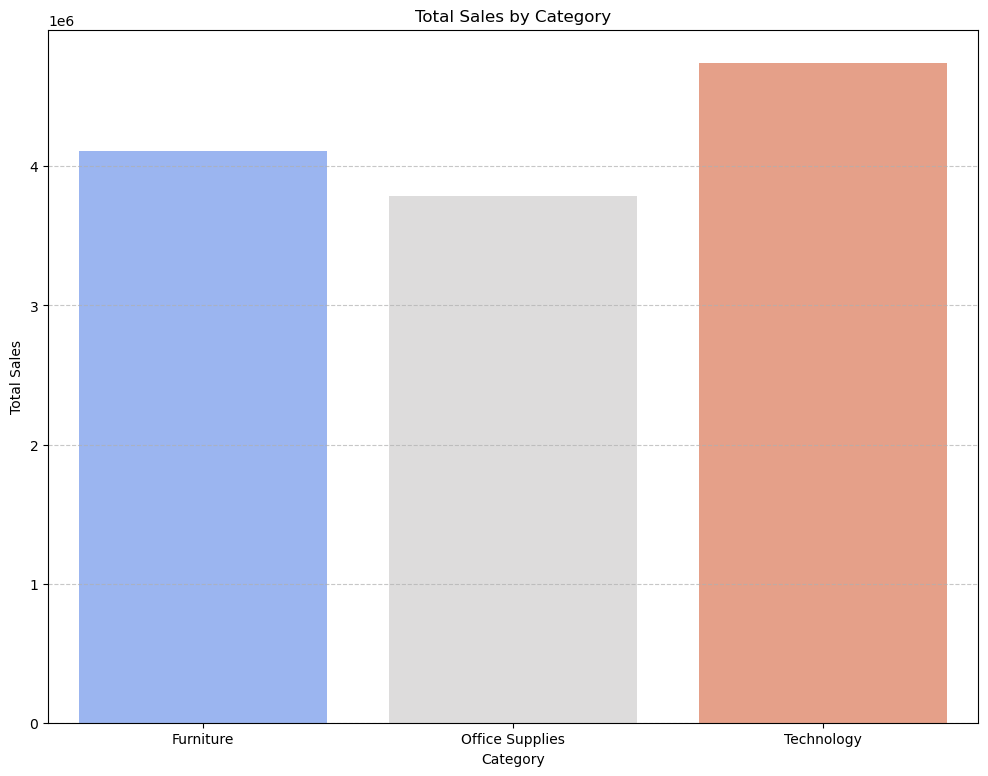

In [24]:
plt.figure(figsize=(12, 9))
sns.barplot(x="Category", y="Sales", hue="Category", data=category_sales, palette="coolwarm", legend=False)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualize sales distribution by Category using pie charts

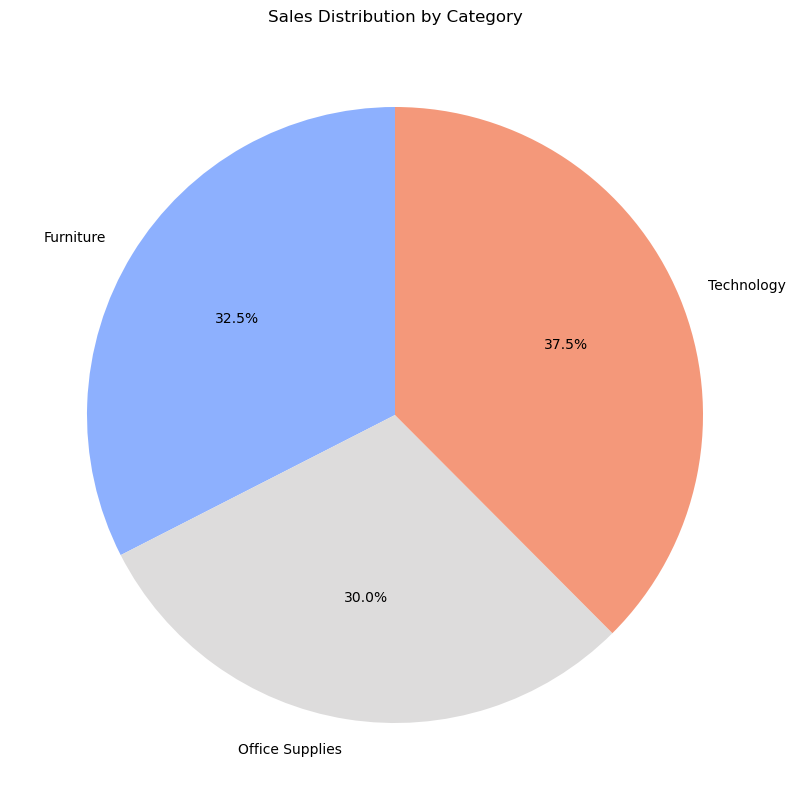

In [25]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette("coolwarm", len(category_sales))
plt.pie(category_sales["Sales"], labels=category_sales["Category"], autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Sales Distribution by Category")
plt.show()

# Train a Linear Regression Model to predict Sales using Profit and Discount as features.

## import basic libraries which is require to create model and some basic mathematical equations are perform on behalf of model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

## for model select dependent and independent vaariables

### "Profit" and "Discount" are independent variables (X). "Sales" is the dependent variable (y).

In [27]:
X = df[["Profit", "Discount"]]
y = df["Sales"]

## If any row in X has missing values, that row is dropped, and the corresponding row in y is also removed to keep both datasets aligned.

In [28]:
X = X.dropna()
y = y.loc[X.index]

## test_size=0.2: Specifies that 20% of the data will be used for testing, and 80% will be used for training.
## random_state=42: Ensures reproducibility by setting a fixed random seed. Any number can be used, but 42 is commonly used in examples.
## train_test_split(X, y, test_size=0.2, random_state=42): Splits X and y into training and testing datasets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creates an instance of the LinearRegression model.
## Trains (fits) the model using the training data (X_train as features and y_train as labels).

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions using model.predict(X_test).

In [31]:
y_pred = model.predict(X_test)

## Evaluate its performance using metrics like R² score, Mean Absolute Error(MAE) or Mean Squared Error (MSE).

### Check R² score

In [32]:
r2 = r2_score(y_test, y_pred)

In [33]:
r2

0.16090406163840798

### Check Mean Absolute Error(MAE)

In [34]:
mae = mean_absolute_error(y_test, y_pred)

In [35]:
mae

221.93725758464726

### Check Mean Squared Error (MSE)

In [36]:
mse = mean_squared_error(y_test, y_pred)

In [37]:
mse

187787.80150462044